### Getting Started with Deep Learning Tutorial, F. Mosconi, Catalit/Cloud Academy  

## Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('C:/Users/aloke/OneDrive/Desktop/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<AxesSubplot:title={'center':'Weight and Height in Adults'}, xlabel='Height', ylabel='Weight'>

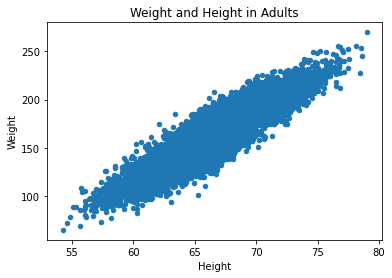

In [4]:
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weight and Height in Adults')

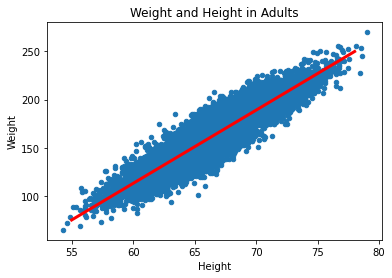

In [6]:
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weight and Height in Adults')
plt.plot([55,78], [75,250], color='red', linewidth=3)

In [11]:
def line(x, w=0, b=0):
    return x * w + b

x = np.linspace(55, 80, 100)
yhat = line(x, w=0, b=1)

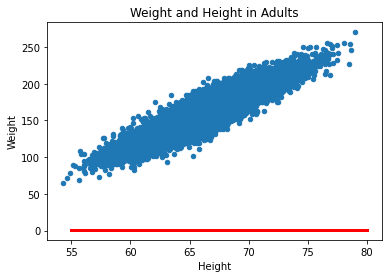

In [13]:
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weight and Height in Adults')
plt.plot(x, yhat, color='red', linewidth=3)

In [14]:
def mean_squared_error(y_true, y_pred):
    s=(y_true - y_pred)**2
    return s.mean()

In [15]:
X=df[['Height']].values
y_true = df['Weight'].values

In [16]:
y_pred = line(X)
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [19]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

Text(0.5, 0, 'b')

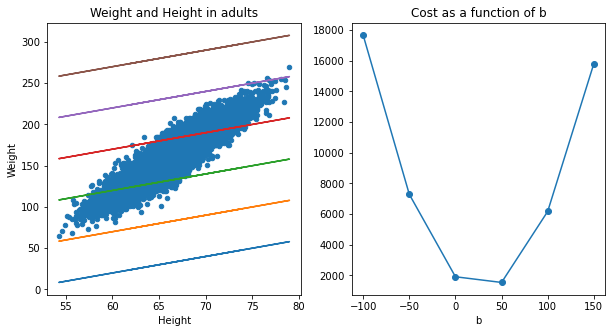

In [22]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weight and Height in adults', ax=ax1)

bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)
    
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')


In [24]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [25]:
model = Sequential()

In [26]:
model.add(Dense(1, input_shape=(1,)))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

In [31]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 0s 314us/step - loss: 915.1890
Epoch 2/40
313/313 [==============================] - 0s 317us/step - loss: 550.7833
Epoch 3/40
313/313 [==============================] - 0s 317us/step - loss: 505.6430
Epoch 4/40
313/313 [==============================] - 0s 311us/step - loss: 475.3560
Epoch 5/40
313/313 [==============================] - 0s 309us/step - loss: 450.1609
Epoch 6/40
313/313 [==============================] - 0s 311us/step - loss: 381.5009
Epoch 7/40
313/313 [==============================] - 0s 330us/step - loss: 347.0369
Epoch 8/40
313/313 [==============================] - 0s 327us/step - loss: 312.5048
Epoch 9/40
313/313 [==============================] - 0s 378us/step - loss: 297.2014
Epoch 10/40
313/313 [==============================] - 0s 375us/step - loss: 271.1513
Epoch 11/40
313/313 [==============================] - 0s 378us/step - loss: 241.4288
Epoch 12/40
313/313 [==============================] - 0s 371us

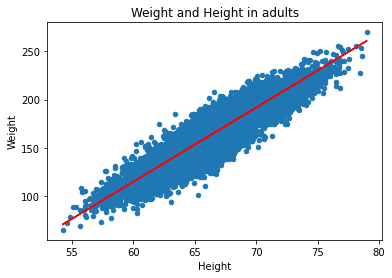

In [32]:
y_pred = model.predict(X)

df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [33]:
W, B = model.get_weights()

In [34]:
W

array([[7.7147045]], dtype=float32)

In [35]:
B

array([-348.2718], dtype=float32)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size = 0.2)

In [38]:
len(X_train)

8000

In [39]:
len(X_test)

2000

In [40]:
W[0, 0]=0.0
B[0] = 0.0
model.set_weights((W,B))

In [41]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [42]:
y_train_pred=model.predict(X_train).ravel()
y_test_pred=model.predict(X_test).ravel()

In [46]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2_score

In [44]:
print("The Mean Squared Error on the Train Set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test Set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))


The Mean Squared Error on the Train Set is:	149.2
The Mean Squared Error on the Test Set is:	151.2


In [47]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.854
The R2 score on the Test set is:	0.858


## Classification

In [48]:
df = pd.read_csv('C:/Users/aloke/OneDrive/Desktop/user_visit_duration.csv')

In [49]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


<AxesSubplot:xlabel='Time (min)', ylabel='Buy'>

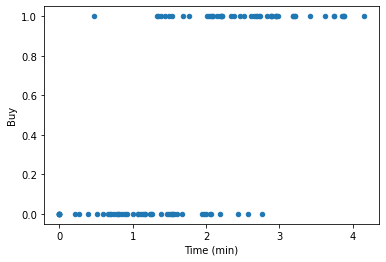

In [50]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [80]:
model = Sequential()

In [81]:
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [82]:
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [84]:
X=df[['Time (min)']].values
y=df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
4/4 [==============================] - 0s 995us/step - loss: 1.6834 - accuracy: 0.3800
Epoch 2/25
4/4 [==============================] - 0s 667us/step - loss: 0.7514 - accuracy: 0.4200
Epoch 3/25
4/4 [==============================] - 0s 1000us/step - loss: 0.6612 - accuracy: 0.5100
Epoch 4/25
4/4 [==============================] - 0s 666us/step - loss: 0.6072 - accuracy: 0.6000
Epoch 5/25
4/4 [==============================] - 0s 665us/step - loss: 0.5694 - accuracy: 0.7600
Epoch 6/25
4/4 [==============================] - 0s 1ms/step - loss: 0.5803 - accuracy: 0.6300
Epoch 7/25
4/4 [==============================] - 0s 1000us/step - loss: 0.5353 - accuracy: 0.7000
Epoch 8/25
4/4 [==============================] - 0s 667us/step - loss: 0.5267 - accuracy: 0.7700
Epoch 9/25
4/4 [==============================] - 0s 668us/step - loss: 0.5070 - accuracy: 0.7300
Epoch 10/25
4/4 [==============================] - 0s 999us/step - loss: 0.5007 - accuracy: 0.7500
Epoch 11/25
4/4 [==

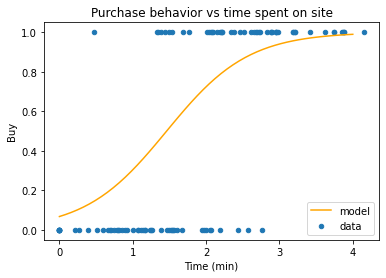

In [85]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy', title='Purchase behavior vs time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [86]:
temp_class=model.predict(temp)>0.5

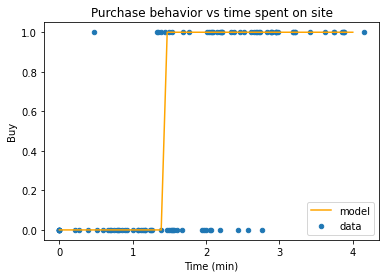

In [87]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy', title='Purchase behavior vs time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [63]:
y_pred =  model.predict(X)
y_class_pred = y_pred > 0.5

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.790


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [94]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [96]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X)>0.5)))

The accuracy score is 0.500


In [97]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [98]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.812
The test accuracy score is 0.900


In [ ]:
# Cross Validation

## Cross Validation

In [126]:
from keras.wrappers.scikit_learn import KerasClassifier

In [127]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape = (1,), activation = 'sigmoid'))
    model.compile(SGD(learning_rate=0.5),
                 'binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [128]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                       epochs=25,
                       verbose=0)

In [129]:
from sklearn.model_selection import cross_val_score, KFold

In [130]:
cv = KFold(3, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

In [131]:
scores

array([0.70588237, 0.84848487, 0.81818181])

In [132]:
print("The cross validation accuracy score is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy score is 0.7908 ± 0.0613


In [133]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(learning_rate=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

cv = KFold(3, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)
scores

array([0.82352942, 0.75757575, 0.84848487])

In [134]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8099 ± 0.0384


## Confusion Matrix

In [136]:
from sklearn.metrics import confusion_matrix

In [137]:
confusion_matrix(y, y_class_pred)

array([[32, 18],
       [ 3, 47]], dtype=int64)

In [138]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [139]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,32,18
Buy,3,47


In [140]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [143]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall: \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))
                                   

Precision:	0.723
Recall: 	0.940
F1 Score:	0.817


In [144]:
from sklearn.metrics import classification_report

In [146]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75        50
           1       0.72      0.94      0.82        50

    accuracy                           0.79       100
   macro avg       0.82      0.79      0.79       100
weighted avg       0.82      0.79      0.79       100



## Feature Preprocessing

### Categorical Features

In [148]:
df=pd.read_csv('C:/Users/aloke/OneDrive/Desktop/weight-height.csv')
df.head()



,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [149]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [150]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Feature Transformations

### Rescale with fixed factor

In [151]:
df['Height (feet)']=df['Height']/12.0
df['Weight (100 lbs)']=df['Weight']/100.0

In [152]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


## MinMax normalization

In [156]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Height_mms'] = mms.fit_transform(df[['Height']])
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Height_mms,Weight_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.49,0.47
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.37,0.35
50%,66.32,161.21,5.53,1.61,0.49,0.47
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


In [157]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Height_ss'] = ss.fit_transform(df[['Height']])
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Height_mms,Weight_mms,Height_ss,Weight_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.49,0.47,-0.00,-0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.15,-3.01
25%,63.51,135.82,5.29,1.36,0.37,0.35,-0.74,-0.80
50%,66.32,161.21,5.53,1.61,0.49,0.47,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.73,0.80
max,79.00,269.99,6.58,2.70,1.00,1.00,3.28,3.38


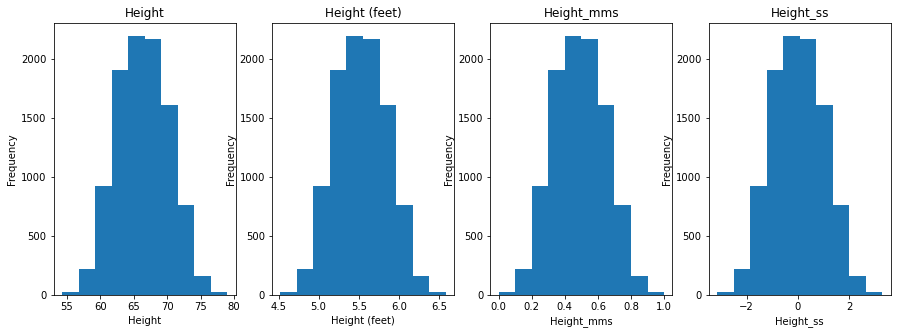

In [162]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title = feature)
    plt.xlabel(feature)
                             

## Exercise 1

In [164]:
df=pd.read_csv('C:/Users/aloke/OneDrive/Desktop/housing-data.csv')

In [165]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


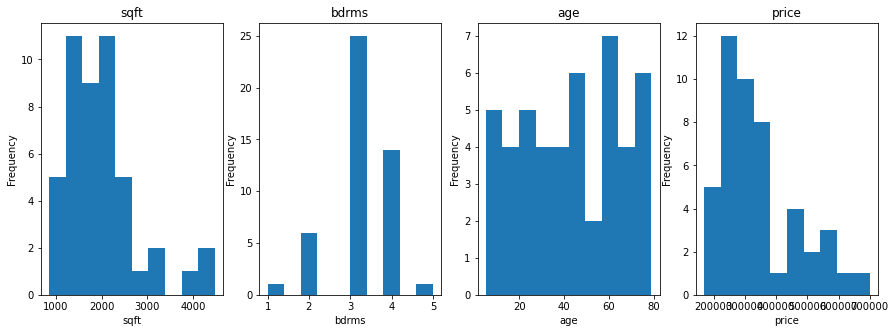

In [166]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['sqft', 'bdrms', 'age', 'price']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title = feature)
    plt.xlabel(feature)
                            

In [214]:
X=df[['sqft', 'bdrms', 'age']].values

In [199]:
y=df['price'].values

In [218]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')
model.fit(X, y, epochs=25)

Epoch 1/25
2/2 [==============================] - 0s 1ms/step - loss: 130692202496.0000
Epoch 2/25
2/2 [==============================] - 0s 1ms/step - loss: 128281862144.0000
Epoch 3/25
2/2 [==============================] - 0s 0s/step - loss: 125846216704.0000
Epoch 4/25
2/2 [==============================] - 0s 2ms/step - loss: 123498561536.0000
Epoch 5/25
2/2 [==============================] - 0s 996us/step - loss: 121025388544.0000
Epoch 6/25
2/2 [==============================] - 0s 999us/step - loss: 118766518272.0000
Epoch 7/25
2/2 [==============================] - 0s 1000us/step - loss: 116334239744.0000
Epoch 8/25
2/2 [==============================] - 0s 1000us/step - loss: 114145492992.0000
Epoch 9/25
2/2 [==============================] - 0s 1ms/step - loss: 111794774016.0000
Epoch 10/25
2/2 [==============================] - 0s 997us/step - loss: 109559037952.0000
Epoch 11/25
2/2 [==============================] - 0s 2ms/step - loss: 107400577024.0000
Epoch 12/25
2/2 [==

In [220]:
W, B = model.get_weights()

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [223]:
model.fit(X_train, y_train)

2/2 [==============================] - 0s 1ms/step - loss: 84556464128.0000


In [224]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [238]:
df['sqft1000']=df['sqft']/1000.0
df['age10']=df['age']/10.0
df['price100k']=df['price']/100000.0

In [239]:
X=df[['sqft1000', 'bdrms', 'age10']].values
y=df['price100k'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)



In [244]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 0s 2ms/step - loss: 20.0052
Epoch 2/50
2/2 [==============================] - 0s 1ms/step - loss: 6.5679
Epoch 3/50
2/2 [==============================] - 0s 0s/step - loss: 8.9271
Epoch 4/50
2/2 [==============================] - 0s 1ms/step - loss: 2.1105
Epoch 5/50
2/2 [==============================] - 0s 1ms/step - loss: 6.5177
Epoch 6/50
2/2 [==============================] - 0s 2ms/step - loss: 2.2132
Epoch 7/50
2/2 [==============================] - 0s 1ms/step - loss: 4.4479
Epoch 8/50
2/2 [==============================] - 0s 2ms/step - loss: 3.6817
Epoch 9/50
2/2 [==============================] - 0s 2ms/step - loss: 1.8125
Epoch 10/50
2/2 [==============================] - 0s 2ms/step - loss: 3.9361
Epoch 11/50
2/2 [==============================] - 0s 999us/step - loss: 0.8887
Epoch 12/50
2/2 [==============================] - 0s 2ms/step - loss: 3.6703
Epoch 13/50
2/2 [==============================] - 0s 1ms/step - loss: 

In [246]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [247]:
print("The R2 score on the train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))  
print("The R2 score on the test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the train set is:	0.549
The R2 score on the test set is:	0.807


## Exercise 2

In [248]:
df=pd.read_csv('C:/Users/aloke/OneDrive/Desktop/HR_comma_sep.csv')

In [249]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [251]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [252]:
left=np.sum(df['left'])
left

3571

In [273]:
df.left.value_counts()/len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [274]:
accuracy=(len(df['left'])-(np.sum(df['left'])))/len(df['left'])
accuracy

0.7619174611640777

<AxesSubplot:ylabel='Frequency'>

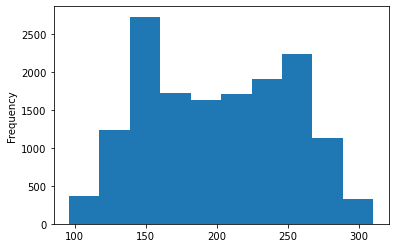

In [275]:
df['average_montly_hours'].plot(kind='hist')

In [267]:
df['average_monthly_hours100']=df['average_montly_hours']/100.0

In [276]:
df_dummies=pd.get_dummies(df[['sales', 'salary']])

In [278]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [279]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'average_monthly_hours100'],
      dtype='object')

In [289]:
X=pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
       'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'average_monthly_hours100']], df_dummies], axis=1).values

In [290]:
y=df['left'].values

In [291]:
X.shape

(14999, 20)

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [295]:
model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))
model.compile(Adam(learning_rate=0.8), 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=40)

Epoch 1/40
375/375 [==============================] - 0s 356us/step - loss: 0.6394 - accuracy: 0.7484
Epoch 2/40
375/375 [==============================] - 0s 353us/step - loss: 0.6274 - accuracy: 0.7556
Epoch 3/40
375/375 [==============================] - 0s 361us/step - loss: 0.6273 - accuracy: 0.7557
Epoch 4/40
375/375 [==============================] - 0s 345us/step - loss: 0.6040 - accuracy: 0.7594
Epoch 5/40
375/375 [==============================] - 0s 342us/step - loss: 0.5817 - accuracy: 0.7649
Epoch 6/40
375/375 [==============================] - 0s 346us/step - loss: 0.6102 - accuracy: 0.7576
Epoch 7/40
375/375 [==============================] - 0s 356us/step - loss: 0.5921 - accuracy: 0.7590
Epoch 8/40
375/375 [==============================] - 0s 372us/step - loss: 0.7262 - accuracy: 0.7486
Epoch 9/40
375/375 [==============================] - 0s 361us/step - loss: 0.6068 - accuracy: 0.7572
Epoch 10/40
375/375 [==============================] - 0s 406us/step - loss: 0.661

In [297]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [300]:
y_test_pred =  (model.predict(X_test) > 0.5).astype("int32")

In [302]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [303]:
pretty_confusion_matrix(y_test, y_test_pred, ['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,1797,475
Leave,331,397


In [304]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      2272
           1       0.46      0.55      0.50       728

    accuracy                           0.73      3000
   macro avg       0.65      0.67      0.66      3000
weighted avg       0.75      0.73      0.74      3000



In [332]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [341]:
def build_logisitc_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

In [342]:
model = KerasClassifier(build_fn=build_logistic_regression_model, epochs=10, verbose=0)

In [343]:
from sklearn.model_selection import KFold, cross_val_score

In [344]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print("The cross validation accuracy score is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy score is 0.7454 ± 0.0614


In [345]:
scores

array([0.76266664, 0.78200001, 0.62400001, 0.76866668, 0.78959656])